In [3]:
# Imports
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from prep_image import prep_im
from model import *

In [4]:
feature_data = '..' + os.sep + 'data' + os.sep + 'feature_data' + os.sep + 'feature_data.csv'
meta_data = '..' +  os.sep + 'data' + os.sep + 'meta_data' + os.sep + 'metadata_withmasks.csv'

In [5]:
# Extract image ids and labels
df = pd.read_csv(meta_data)
df_features = pd.read_csv(feature_data)

# Remove data for images without masks
df_mask = df['mask'] == 1
df = df.loc[df_mask]

# Extract labels for images
labels = df['diagnostic']

feature_names = ['mean_assymmetry', 'best_asymmetry', 'worst_asymmetry', 'red_var', 'green_var', \
     'blue_var', 'hue_var', 'sat_var', 'val_var', 'dom_hue', 'dom_sat', 'dom_val', \
     'compactness', 'convexity', 'F1', 'F2', 'F3', 'F10', 'F11', 'F12']

X=df_features[feature_names]
y = (labels == 'BCC') | (labels == 'SCC') | (labels == 'MEL') 

In [6]:
feature_selector = train_feature_selector(X,y,5)
scores = feature_scores(feature_selector)

In [7]:
scores_sorted = np.sort(scores)[::-1]
threshold = scores_sorted[5]

In [8]:
def plot_feature_scores(scores, X_train):
    # Get no. of features
    features = len(scores)

    # Visualize feature scores
    plt.bar(np.arange(0,features), scores, width=.2)
    plt.xticks(np.arange(0,features), list(X_train.columns), rotation='vertical')
    plt.show()

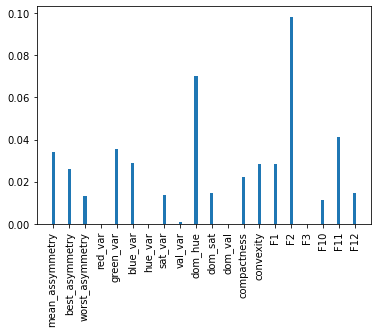

In [9]:
plot_feature_scores(scores, X)

In [10]:
df_features[feature_names].columns[scores > threshold]

Index(['mean_assymmetry', 'green_var', 'dom_hue', 'F2', 'F11'], dtype='object')

In [11]:
df_features.insert(len(df_features.columns), 'cancer',y)

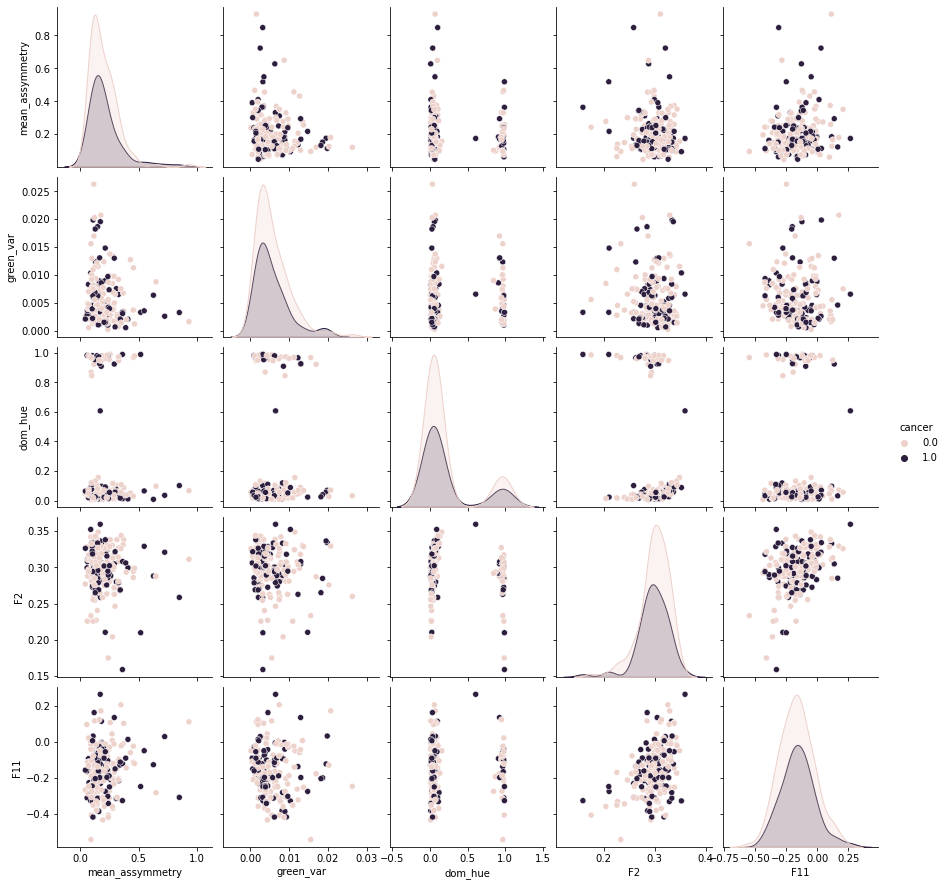

In [12]:
sns.pairplot(vars=df_features[feature_names].columns[scores > threshold], data=df_features, hue='cancer')

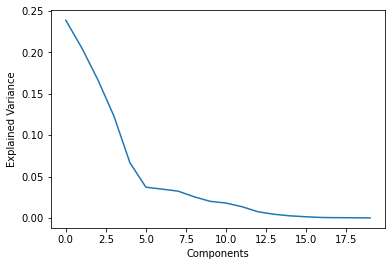

In [13]:
X_normalized=(X - X.mean()) / X.std()
pca = PCA(n_components=X.shape[1])
pca.fit(X_normalized)
X_transformed = pca.transform(X)

loadings = pd.DataFrame(pca.components_.T,
    columns=['PC%s' % _ for _ in range(len(X_normalized.columns))],
    index=X.columns)

plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

In [14]:
loadings

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
mean_assymmetry,0.339397,0.107940,0.272116,0.193646,-0.048166,-0.024260,0.043111,-0.122253,0.166691,0.006731,0.197077,0.248867,0.001187,-0.028179,0.004129,-0.013504,-0.018129,0.037251,0.781398,0.000781
best_asymmetry,0.341031,0.089560,0.262066,0.169576,-0.012104,0.029500,0.017019,-0.091075,0.068867,-0.041567,-0.238018,-0.341575,0.014922,-0.745083,-0.009267,-0.007613,0.027715,-0.007660,-0.180282,-0.000389
worst_asymmetry,0.320596,0.107094,0.261029,0.189962,-0.054229,-0.038472,0.054212,-0.130575,0.185913,0.026130,0.357503,0.470256,-0.008858,0.140472,0.009466,0.021627,0.001228,-0.019364,-0.593446,-0.000530
red_var,-0.264913,-0.057097,0.384756,-0.013924,-0.123670,-0.188483,0.149711,-0.151476,-0.186811,0.038706,-0.339349,0.219532,0.049933,-0.008968,0.036305,-0.201196,-0.659464,-0.054079,-0.014623,-0.000388
green_var,-0.172013,-0.169392,0.391620,-0.234314,-0.008905,-0.008014,-0.040186,-0.021665,0.037462,-0.092410,0.353360,-0.234464,-0.048454,-0.003042,-0.731361,0.051023,-0.015402,-0.036747,0.002294,-0.000231
blue_var,-0.138488,-0.216198,0.361667,-0.248669,0.054839,0.081342,-0.070712,0.004276,0.091732,-0.114659,0.408206,-0.285316,-0.010642,-0.015127,0.670135,0.040236,-0.075445,0.021567,-0.000649,0.000176
hue_var,-0.030457,-0.246474,0.053431,0.247141,-0.059979,0.057408,0.681247,0.605806,0.177939,0.009790,0.013403,-0.051990,-0.034708,0.011671,-0.009704,-0.016876,-0.002693,0.004999,-0.002230,-0.000044
sat_var,-0.182448,-0.006332,0.267526,0.035782,0.225804,0.679644,-0.311219,0.203063,0.248583,0.242963,-0.258367,0.224518,-0.023197,-0.000229,-0.040074,-0.038171,0.033636,0.010371,0.000449,0.000073
val_var,-0.258685,-0.069919,0.393187,-0.038448,-0.124781,-0.178705,0.169655,-0.165853,-0.184593,0.016119,-0.268965,0.174197,0.003386,0.030803,0.088478,0.081568,0.714689,0.070089,0.012954,0.000438
dom_hue,0.005801,-0.135778,-0.006461,0.002443,0.717397,-0.310919,0.161443,-0.190851,0.116082,0.529547,0.017056,-0.069649,-0.092128,-0.006819,-0.007349,-0.005894,0.001199,-0.000942,0.002142,-0.000097
